In [12]:
from libPytorch.utility_dataset import *
from libPytorch.model_AE import *

from IPython.display import clear_output

from pylab import *
%matplotlib inline
#%qtconsole #--style monokai

# 0. Load dataset and Model

In [13]:
trnset = np.fromfile("../data/MNIST/MNIST_train_data.dat").reshape(-1,785)

trnset  = tcDataset(trnset)
batches = DataLoader(trnset, batch_size=100, shuffle=False)
model   = AE()

# 1. Training

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lossfunc  = nn.MSELoss(size_average=False)
model.cuda()
model.train()
# begin Training
for epoch in range(20):
    running_loss = 0.0
    for i, batch in enumerate(batches):
        
        # 1.get the inputs
        inputs = Variable(batch["data"]).cuda()
        labels = Variable(batch["label"]).cuda()
        # 2.zero the parameter gradients
        optimizer.zero_grad()
        # 3.forward + backward + optimize 
        recons, codes = model(inputs)
        loss = lossfunc(recons, inputs)
        
        loss.backward()
        optimizer.step()
        
        # TRAINING DESHBOARD #
        ##################################################################
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 100 mini-batches
            print('[{:5d}, {:5d}] loss: {:5.3f}'.
                  format(epoch+1, i+1, running_loss/100))
            clear_output(wait=True)
            running_loss = 0.0
        ##################################################################

[   15,   500] loss: 2952.539


# 2. Test Accuracy

In [10]:
model.cpu()
model.eval()

for batch in DataLoader(trnset,batch_size=len(trnset), shuffle=False):
    inputs  = Variable(batch["data"])
    labels  = Variable(batch["label"])
    recons, codes = model(inputs)
    
codes = codes.data.numpy()
recons = recons.data.numpy()

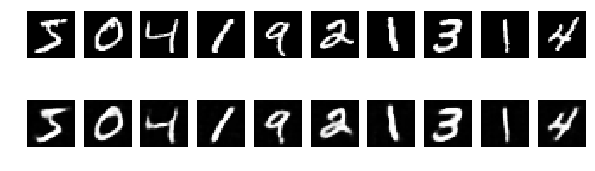

In [11]:
fig = plt.figure(figsize=(10,3))
ncol = 10
for col in range(ncol):
    plt.subplot(2,ncol,col+1)
    a = trnset[col]['data']
    a = a.reshape(28,28).T
    imshow(a,cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,ncol,ncol+col+1)
    a = recons[col]
    a = a.reshape(28,28).T
    imshow(a,cmap='gray')
    plt.axis('off')
plt.savefig("../plot/dcAE.png")